In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from matplotlib import pylab, pyplot
import warnings
warnings.filterwarnings('ignore')
np.set_printoptions(suppress=True, precision=3)
plt.style.use("seaborn")
pd.set_option('display.max_rows', 600)
plt.rcParams.update({'font.family':'Times New Roman'})
import matplotlib as mpl  
mpl.rc('font',family='Times New Roman')

# Sklearn Libraries
from sklearn.model_selection import cross_val_score, train_test_split, RepeatedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from catboost import CatBoostRegressor

In [2]:
df = pd.read_excel("Carius.xlsx")

In [3]:
df = df[['pH', 'PPM', 'Loading', 'Time', 'Degredation']]

In [4]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df, test_size=0.3, random_state = 21)

In [5]:
X_train = train_data[['pH', 'PPM', 'Loading', 'Time']].values
y_train = train_data["Degredation"].values

X_test = test_data[['pH', 'PPM', 'Loading', 'Time']].values
y_test = test_data["Degredation"].values

In [6]:
scalar = MinMaxScaler(feature_range=(0, 1))

X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)

In [7]:
catb_model = CatBoostRegressor(iterations=781, learning_rate=0.15398886238542636)
catb_model.fit(X_train_scaled, y_train)


catb_test_pred = catb_model.predict(X_test_scaled)
catb_train_pred = catb_model.predict(X_train_scaled)


print("====================r2 Score===================")
print(np.round(r2_score(y_test, catb_test_pred), 3))
print(np.round(r2_score(y_train, catb_train_pred), 3))


print("======================Root Mean Squared Error=========================")
print(np.round(mean_squared_error(y_test, catb_test_pred, squared=False) * 100, 3))
print(np.round(mean_squared_error(y_train, catb_train_pred, squared=False) * 100, 3))

print("======================Mean Absolute Error=========================")
print(np.round(mean_absolute_error(y_test, catb_test_pred) * 100, 3))
print(np.round(mean_absolute_error(y_train, catb_train_pred) * 100, 3))

0:	learn: 0.2061148	total: 50.3ms	remaining: 39.2s
1:	learn: 0.1892228	total: 50.8ms	remaining: 19.8s
2:	learn: 0.1743380	total: 51.2ms	remaining: 13.3s
3:	learn: 0.1636236	total: 51.5ms	remaining: 10s
4:	learn: 0.1524446	total: 51.9ms	remaining: 8.05s
5:	learn: 0.1416809	total: 52.2ms	remaining: 6.74s
6:	learn: 0.1318825	total: 52.5ms	remaining: 5.81s
7:	learn: 0.1244767	total: 52.9ms	remaining: 5.11s
8:	learn: 0.1173134	total: 53.3ms	remaining: 4.57s
9:	learn: 0.1119963	total: 53.7ms	remaining: 4.14s
10:	learn: 0.1054474	total: 54.1ms	remaining: 3.78s
11:	learn: 0.1001678	total: 54.5ms	remaining: 3.49s
12:	learn: 0.0972889	total: 54.7ms	remaining: 3.23s
13:	learn: 0.0957072	total: 55ms	remaining: 3.01s
14:	learn: 0.0906609	total: 55.4ms	remaining: 2.83s
15:	learn: 0.0855603	total: 55.8ms	remaining: 2.67s
16:	learn: 0.0816907	total: 56.1ms	remaining: 2.52s
17:	learn: 0.0782659	total: 56.5ms	remaining: 2.4s
18:	learn: 0.0741449	total: 56.9ms	remaining: 2.28s
19:	learn: 0.0716642	total:

316:	learn: 0.0075401	total: 182ms	remaining: 266ms
317:	learn: 0.0075127	total: 182ms	remaining: 265ms
318:	learn: 0.0074834	total: 183ms	remaining: 265ms
319:	learn: 0.0074534	total: 183ms	remaining: 264ms
320:	learn: 0.0074309	total: 183ms	remaining: 263ms
321:	learn: 0.0074035	total: 184ms	remaining: 262ms
322:	learn: 0.0073670	total: 185ms	remaining: 262ms
323:	learn: 0.0073379	total: 185ms	remaining: 261ms
324:	learn: 0.0073065	total: 185ms	remaining: 260ms
325:	learn: 0.0072841	total: 186ms	remaining: 259ms
326:	learn: 0.0072634	total: 186ms	remaining: 258ms
327:	learn: 0.0072422	total: 187ms	remaining: 258ms
328:	learn: 0.0072089	total: 187ms	remaining: 257ms
329:	learn: 0.0071888	total: 187ms	remaining: 256ms
330:	learn: 0.0071679	total: 188ms	remaining: 255ms
331:	learn: 0.0071414	total: 188ms	remaining: 255ms
332:	learn: 0.0071111	total: 189ms	remaining: 254ms
333:	learn: 0.0070951	total: 189ms	remaining: 253ms
334:	learn: 0.0070827	total: 189ms	remaining: 252ms
335:	learn: 

728:	learn: 0.0027735	total: 342ms	remaining: 24.4ms
729:	learn: 0.0027690	total: 343ms	remaining: 23.9ms
730:	learn: 0.0027636	total: 343ms	remaining: 23.5ms
731:	learn: 0.0027588	total: 344ms	remaining: 23ms
732:	learn: 0.0027519	total: 344ms	remaining: 22.5ms
733:	learn: 0.0027454	total: 345ms	remaining: 22.1ms
734:	learn: 0.0027392	total: 345ms	remaining: 21.6ms
735:	learn: 0.0027327	total: 345ms	remaining: 21.1ms
736:	learn: 0.0027284	total: 346ms	remaining: 20.6ms
737:	learn: 0.0027255	total: 346ms	remaining: 20.2ms
738:	learn: 0.0027209	total: 347ms	remaining: 19.7ms
739:	learn: 0.0027147	total: 347ms	remaining: 19.2ms
740:	learn: 0.0027076	total: 348ms	remaining: 18.8ms
741:	learn: 0.0027017	total: 348ms	remaining: 18.3ms
742:	learn: 0.0026947	total: 348ms	remaining: 17.8ms
743:	learn: 0.0026894	total: 349ms	remaining: 17.3ms
744:	learn: 0.0026787	total: 349ms	remaining: 16.9ms
745:	learn: 0.0026737	total: 350ms	remaining: 16.4ms
746:	learn: 0.0026705	total: 350ms	remaining: 15

In [8]:
catb_model.get_feature_importance()

array([23.07 , 17.276, 28.572, 31.082])

In [9]:
features = ['pH', 'PPM', 'Loading', 'Time']
feature_importances = [23.07, 17.276, 28.572, 31.082]

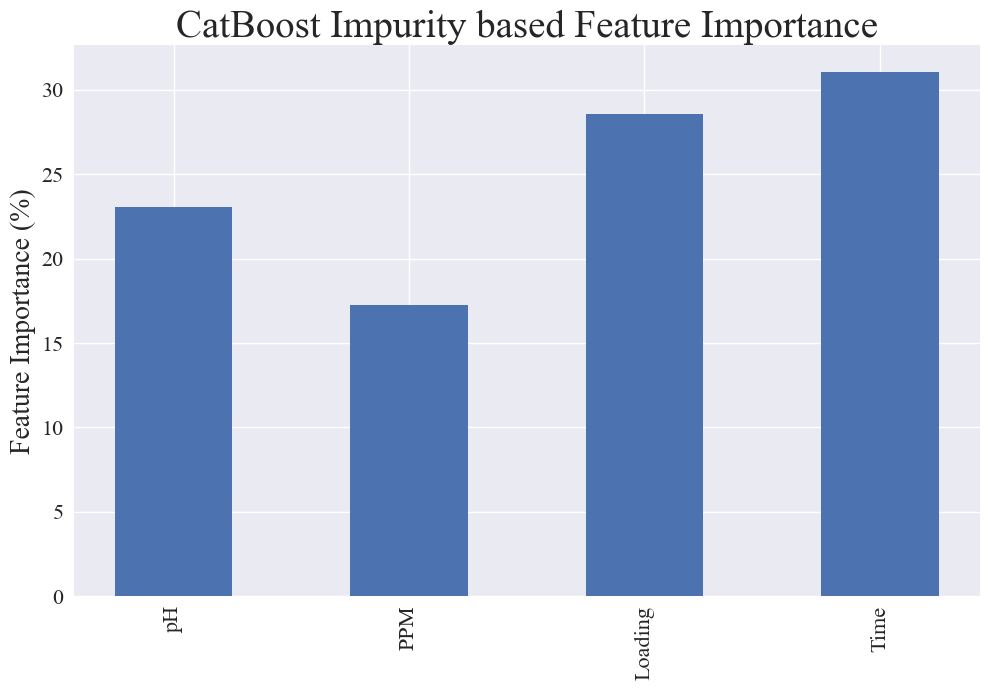

In [21]:
plt.figure(figsize=(10, 7))
importance_vals = catb_model.feature_importances_
indices = np.argsort(importance_vals)[::-1]

plt.title("CatBoost Impurity based Feature Importance", fontname="Times New Roman", fontsize=28)
plt.bar(features, feature_importances, width=0.5)

plt.xticks(features, rotation=90)
plt.xticks(fontname="Times New Roman", fontsize=16)
plt.yticks(fontname="Times New Roman", fontsize=16)
plt.ylabel("Feature Importance (%)", fontsize=20)
# plt.xlim([-1, X_train_scaled.shape[1]])
# plt.ylim([0, 0.3])

plt.tight_layout()
# plt.show()
plt.savefig("Feature_importance Impurity Based.jpg", bbox_inches = 'tight', dpi=700);

In [22]:
from sklearn.inspection import permutation_importance

catboost_model = CatBoostRegressor(iterations=781, learning_rate=0.15398886238542636)

catboost_model.fit(X_train_scaled, y_train)

result = permutation_importance(estimator=catboost_model, X=X_test_scaled, y=y_test, scoring="r2", n_repeats=50, random_state=42)

0:	learn: 0.2061148	total: 557us	remaining: 435ms
1:	learn: 0.1892228	total: 1.95ms	remaining: 759ms
2:	learn: 0.1743380	total: 2.51ms	remaining: 651ms
3:	learn: 0.1636236	total: 3.3ms	remaining: 641ms
4:	learn: 0.1524446	total: 3.81ms	remaining: 591ms
5:	learn: 0.1416809	total: 4.37ms	remaining: 565ms
6:	learn: 0.1318825	total: 4.86ms	remaining: 538ms
7:	learn: 0.1244767	total: 5.38ms	remaining: 520ms
8:	learn: 0.1173134	total: 6.33ms	remaining: 543ms
9:	learn: 0.1119963	total: 6.72ms	remaining: 519ms
10:	learn: 0.1054474	total: 7.17ms	remaining: 502ms
11:	learn: 0.1001678	total: 7.61ms	remaining: 488ms
12:	learn: 0.0972889	total: 7.92ms	remaining: 468ms
13:	learn: 0.0957072	total: 8.21ms	remaining: 450ms
14:	learn: 0.0906609	total: 8.66ms	remaining: 442ms
15:	learn: 0.0855603	total: 9.1ms	remaining: 435ms
16:	learn: 0.0816907	total: 9.58ms	remaining: 430ms
17:	learn: 0.0782659	total: 10ms	remaining: 426ms
18:	learn: 0.0741449	total: 10.5ms	remaining: 422ms
19:	learn: 0.0716642	total:

295:	learn: 0.0081519	total: 119ms	remaining: 195ms
296:	learn: 0.0081195	total: 120ms	remaining: 195ms
297:	learn: 0.0080920	total: 120ms	remaining: 194ms
298:	learn: 0.0080531	total: 120ms	remaining: 194ms
299:	learn: 0.0080148	total: 121ms	remaining: 194ms
300:	learn: 0.0079866	total: 121ms	remaining: 193ms
301:	learn: 0.0079381	total: 122ms	remaining: 193ms
302:	learn: 0.0079220	total: 122ms	remaining: 193ms
303:	learn: 0.0079075	total: 123ms	remaining: 193ms
304:	learn: 0.0078941	total: 123ms	remaining: 192ms
305:	learn: 0.0078495	total: 124ms	remaining: 192ms
306:	learn: 0.0078354	total: 124ms	remaining: 191ms
307:	learn: 0.0078169	total: 124ms	remaining: 191ms
308:	learn: 0.0077611	total: 125ms	remaining: 191ms
309:	learn: 0.0077313	total: 125ms	remaining: 190ms
310:	learn: 0.0076996	total: 125ms	remaining: 190ms
311:	learn: 0.0076739	total: 126ms	remaining: 189ms
312:	learn: 0.0076512	total: 126ms	remaining: 189ms
313:	learn: 0.0076193	total: 127ms	remaining: 188ms
314:	learn: 

642:	learn: 0.0033212	total: 269ms	remaining: 57.7ms
643:	learn: 0.0033114	total: 270ms	remaining: 57.4ms
644:	learn: 0.0033068	total: 270ms	remaining: 57ms
645:	learn: 0.0032992	total: 271ms	remaining: 56.6ms
646:	learn: 0.0032948	total: 271ms	remaining: 56.2ms
647:	learn: 0.0032861	total: 272ms	remaining: 55.8ms
648:	learn: 0.0032825	total: 273ms	remaining: 55.4ms
649:	learn: 0.0032786	total: 273ms	remaining: 55.1ms
650:	learn: 0.0032721	total: 274ms	remaining: 54.7ms
651:	learn: 0.0032573	total: 274ms	remaining: 54.3ms
652:	learn: 0.0032504	total: 275ms	remaining: 53.9ms
653:	learn: 0.0032434	total: 275ms	remaining: 53.5ms
654:	learn: 0.0032351	total: 276ms	remaining: 53ms
655:	learn: 0.0032310	total: 276ms	remaining: 52.6ms
656:	learn: 0.0032268	total: 276ms	remaining: 52.2ms
657:	learn: 0.0032231	total: 277ms	remaining: 51.8ms
658:	learn: 0.0032141	total: 278ms	remaining: 51.4ms
659:	learn: 0.0032099	total: 278ms	remaining: 50.9ms
660:	learn: 0.0032045	total: 278ms	remaining: 50.5

In [23]:
result

{'importances_mean': array([0.396, 0.303, 0.663, 0.637]),
 'importances_std': array([0.057, 0.047, 0.08 , 0.091]),
 'importances': array([[0.385, 0.362, 0.466, 0.359, 0.387, 0.34 , 0.425, 0.389, 0.297,
         0.314, 0.518, 0.411, 0.471, 0.431, 0.466, 0.42 , 0.382, 0.41 ,
         0.296, 0.3  , 0.381, 0.458, 0.361, 0.417, 0.306, 0.422, 0.509,
         0.255, 0.465, 0.418, 0.396, 0.445, 0.329, 0.444, 0.397, 0.329,
         0.46 , 0.335, 0.392, 0.417, 0.403, 0.485, 0.384, 0.39 , 0.369,
         0.362, 0.422, 0.44 , 0.372, 0.392],
        [0.393, 0.294, 0.315, 0.298, 0.249, 0.267, 0.254, 0.345, 0.24 ,
         0.416, 0.29 , 0.343, 0.25 , 0.332, 0.358, 0.305, 0.253, 0.268,
         0.327, 0.342, 0.279, 0.378, 0.268, 0.329, 0.263, 0.251, 0.39 ,
         0.365, 0.294, 0.313, 0.289, 0.322, 0.246, 0.301, 0.36 , 0.244,
         0.326, 0.312, 0.283, 0.343, 0.246, 0.266, 0.372, 0.279, 0.314,
         0.261, 0.34 , 0.224, 0.231, 0.348],
        [0.569, 0.726, 0.639, 0.627, 0.799, 0.559, 0.721, 0.

In [24]:
features = ['pH', 'PPM', 'Loading', 'Time']
importances_mean = [0.396, 0.303, 0.663, 0.637]
importances_std = [0.057, 0.047, 0.08 , 0.091]

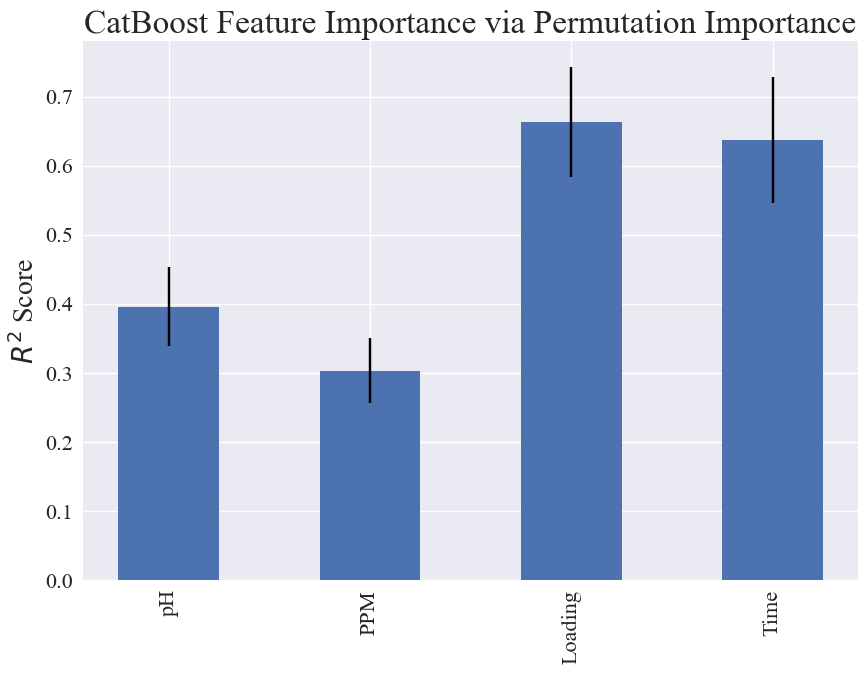

In [27]:
plt.figure(figsize=(10, 7))
plt.title("CatBoost Feature Importance via Permutation Importance", fontname="Times New Roman", fontsize=24)
plt.bar(features, importances_mean, yerr=importances_std, width=0.5)
plt.xticks(features, rotation=90)
plt.xticks(fontname="Times New Roman", fontsize=16)
plt.yticks(fontname="Times New Roman", fontsize=16)
plt.ylabel("$R^2$ Score", fontsize=20)
plt.savefig("Feature_importance Permutation Based.jpg", bbox_inches = 'tight', dpi=700);